# Twitter Sentiment Analysis
## Analyze and Visualize Sentiment Patterns in Social Media Data

**Objective:** Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

---

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configure visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load and Explore Data

In [ ]:
# Load the Twitter training data
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

print("📊 Dataset Information:")
print(f"   Total Tweets: {len(df):,}")
print(f"   Columns: {list(df.columns)}")
print(f"   Shape: {df.shape}")
print("\n" + "="*60)
print("\nFirst 5 tweets:")
print(df.head())

📊 Dataset Information:
   Total Tweets: 74,682
   Columns: ['ID', 'Topic', 'Sentiment', 'Tweet']
   Shape: (74682, 4)


First 5 tweets:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Check for missing values and data types
print("\n📋 Data Quality Check:")
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nDataFrame Info:")
print(df.info())


📋 Data Quality Check:

Missing Values:
ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

Data Types:
ID            int64
Topic        object
Sentiment    object
Tweet        object
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
# Explore unique values
print("\n🔍 Unique Values Analysis:")
print(f"\nUnique Topics: {df['Topic'].nunique()}")
print(f"Unique Sentiments: {df['Sentiment'].nunique()}")
print(f"Unique Tweets: {df['Tweet'].nunique()}")

print("\n📌 Sentiment Values:")
print(df['Sentiment'].unique())

print("\n📌 Top 20 Topics:")
print(df['Topic'].value_counts().head(20))


🔍 Unique Values Analysis:

Unique Topics: 32
Unique Sentiments: 4
Unique Tweets: 69491

📌 Sentiment Values:
['Positive' 'Neutral' 'Negative' 'Irrelevant']

📌 Top 20 Topics:
Topic
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Dota2                        2364
NBA2K                        2352
TomClancysGhostRecon         2346
Battlefield                  2346
FIFA                         2340
Overwatch                    2334
Xbox(Xseries)                2334
johnson&johnson              2328
Amazon                       2316
HomeDepot                    2310
Name: count, dtype: int64


## 3. Overall Sentiment Distribution

In [ ]:
# Calculate sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_pct = (df['Sentiment'].value_counts(normalize=True) * 100).round(2)

print("\n📈 Overall Sentiment Distribution:")
print("\nCount:")
print(sentiment_counts)
print("\nPercentage:")
print(sentiment_pct)

# Create summary table
sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage': sentiment_pct
})
print("\nSummary Table:")
print(sentiment_summary)


📈 Overall Sentiment Distribution:

Count:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Percentage:
Sentiment
Negative      30.18
Positive      27.89
Neutral       24.53
Irrelevant    17.39
Name: proportion, dtype: float64

Summary Table:
            Count  Percentage
Sentiment                    
Negative    22542       30.18
Positive    20832       27.89
Neutral     18318       24.53
Irrelevant  12990       17.39


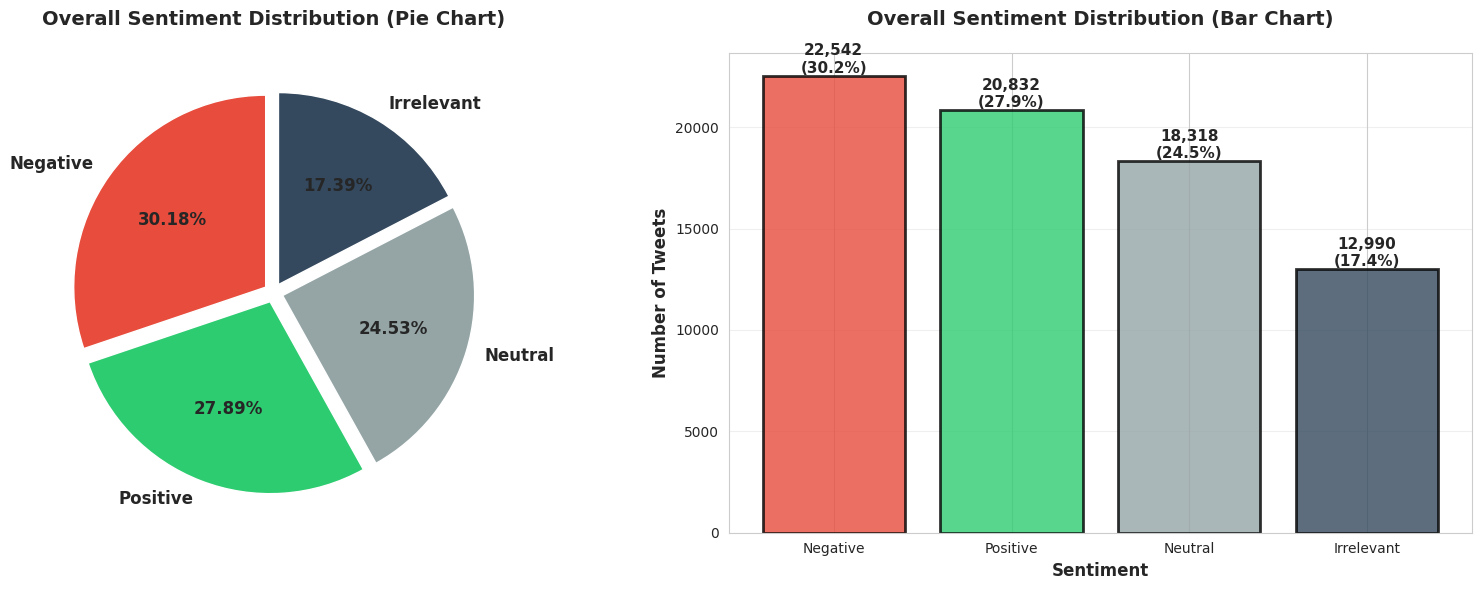

✓ Visualization complete!


In [ ]:
# Visualize overall sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define colors
colors_dict = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
sentiment_colors = [colors_dict.get(s, '#34495e') for s in sentiment_counts.index]

# 1. Pie Chart
wedges, texts, autotexts = axes[0].pie(sentiment_counts.values,
                                        labels=sentiment_counts.index,
                                        autopct='%1.2f%%',
                                        colors=sentiment_colors,
                                        startangle=90,
                                        textprops={'fontsize': 12, 'weight': 'bold'},
                                        explode=(0.05, 0.05, 0.05, 0.05)) # Corrected explode to match 4 sentiments
axes[0].set_title('Overall Sentiment Distribution (Pie Chart)', fontsize=14, weight='bold', pad=20)

# 2. Bar Chart
bars = axes[1].bar(sentiment_counts.index, sentiment_counts.values,
                   color=sentiment_colors, edgecolor='black', linewidth=2, alpha=0.8)
axes[1].set_ylabel('Number of Tweets', fontsize=12, weight='bold')
axes[1].set_xlabel('Sentiment', fontsize=12, weight='bold')
axes[1].set_title('Overall Sentiment Distribution (Bar Chart)', fontsize=14, weight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")

In [ ]:
# Create cross-tabulation of topics and sentiments
topic_sentiment_cross = pd.crosstab(df['Topic'], df['Sentiment'])
topic_sentiment_pct = pd.crosstab(df['Topic'], df['Sentiment'], normalize='index') * 100

print("\n📊 Sentiment Distribution by Topic (Top 20):")
print("\nAbsolute Counts:")
print(topic_sentiment_cross.head(20))
print("\nPercentages:")
print(topic_sentiment_pct.head(20).round(2))


📊 Sentiment Distribution by Topic (Top 20):

Absolute Counts:
Sentiment                  Irrelevant  Negative  Neutral  Positive
Topic                                                             
Amazon                            192       576     1236       312
ApexLegends                       192       600      942       642
AssassinsCreed                    264       378      156      1446
Battlefield                       918       474      360       594
Borderlands                       240       426      600      1020
CS-GO                             636       348      552       768
CallOfDuty                        672       894      378       450
CallOfDutyBlackopsColdWar         576       576      360       864
Cyberpunk2077                     480       390      468       966
Dota2                             426       768      588       582
FIFA                              558      1176      102       504
Facebook                          690       720      786       174

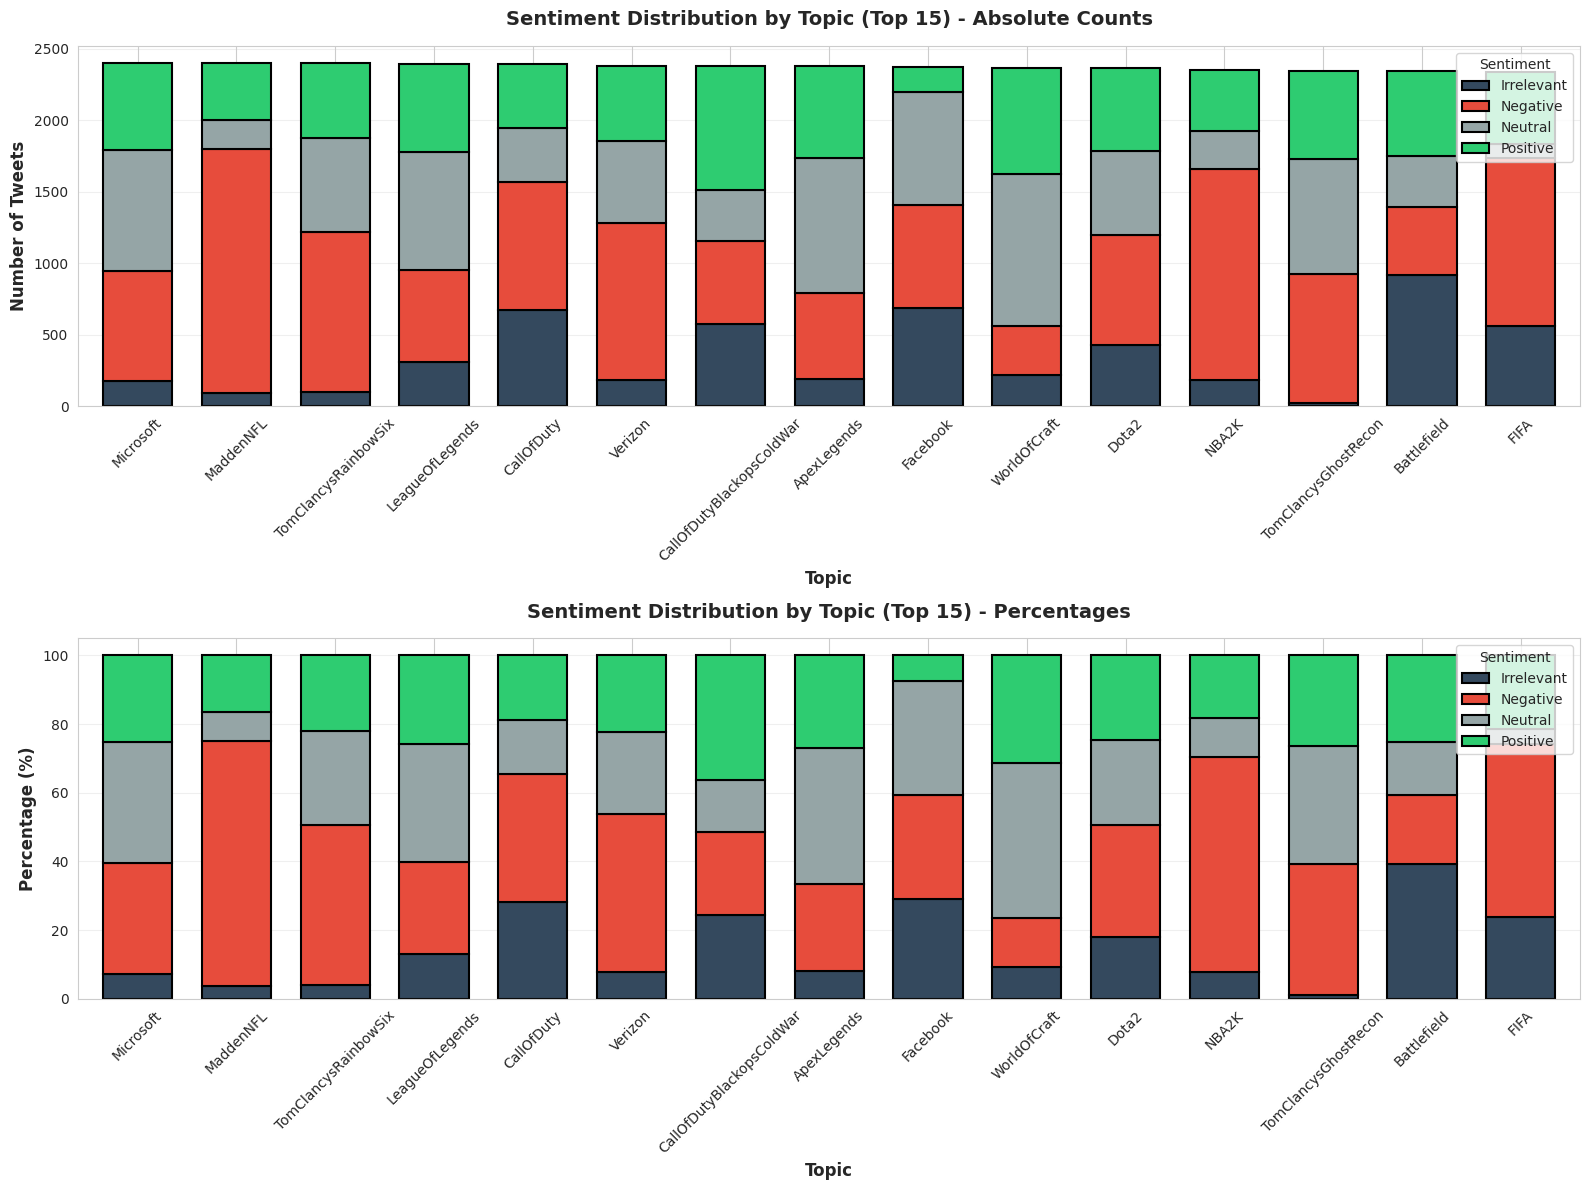

✓ Topic sentiment analysis visualization complete!


In [ ]:
# Visualize sentiment by topic
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Get top 15 topics
top_topics = df['Topic'].value_counts().head(15).index
top_topic_data = topic_sentiment_cross.loc[top_topics]
top_topic_pct = topic_sentiment_pct.loc[top_topics]

# Plot 1: Stacked bar chart - Absolute counts
top_topic_data.plot(kind='bar', stacked=True, ax=axes[0],
                    color=[colors_dict.get(s, '#34495e') for s in top_topic_data.columns],
                    edgecolor='black', linewidth=1.5, width=0.7)
axes[0].set_title('Sentiment Distribution by Topic (Top 15) - Absolute Counts',
                  fontsize=14, weight='bold', pad=15)
axes[0].set_xlabel('Topic', fontsize=12, weight='bold')
axes[0].set_ylabel('Number of Tweets', fontsize=12, weight='bold')
axes[0].legend(title='Sentiment', loc='upper right', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Stacked percentage bar chart
top_topic_pct.plot(kind='bar', stacked=True, ax=axes[1],
                   color=[colors_dict.get(s, '#34495e') for s in top_topic_pct.columns],
                   edgecolor='black', linewidth=1.5, width=0.7)
axes[1].set_title('Sentiment Distribution by Topic (Top 15) - Percentages',
                  fontsize=14, weight='bold', pad=15)
axes[1].set_xlabel('Topic', fontsize=12, weight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, weight='bold')
axes[1].legend(title='Sentiment', loc='upper right', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0, 105])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Topic sentiment analysis visualization complete!")

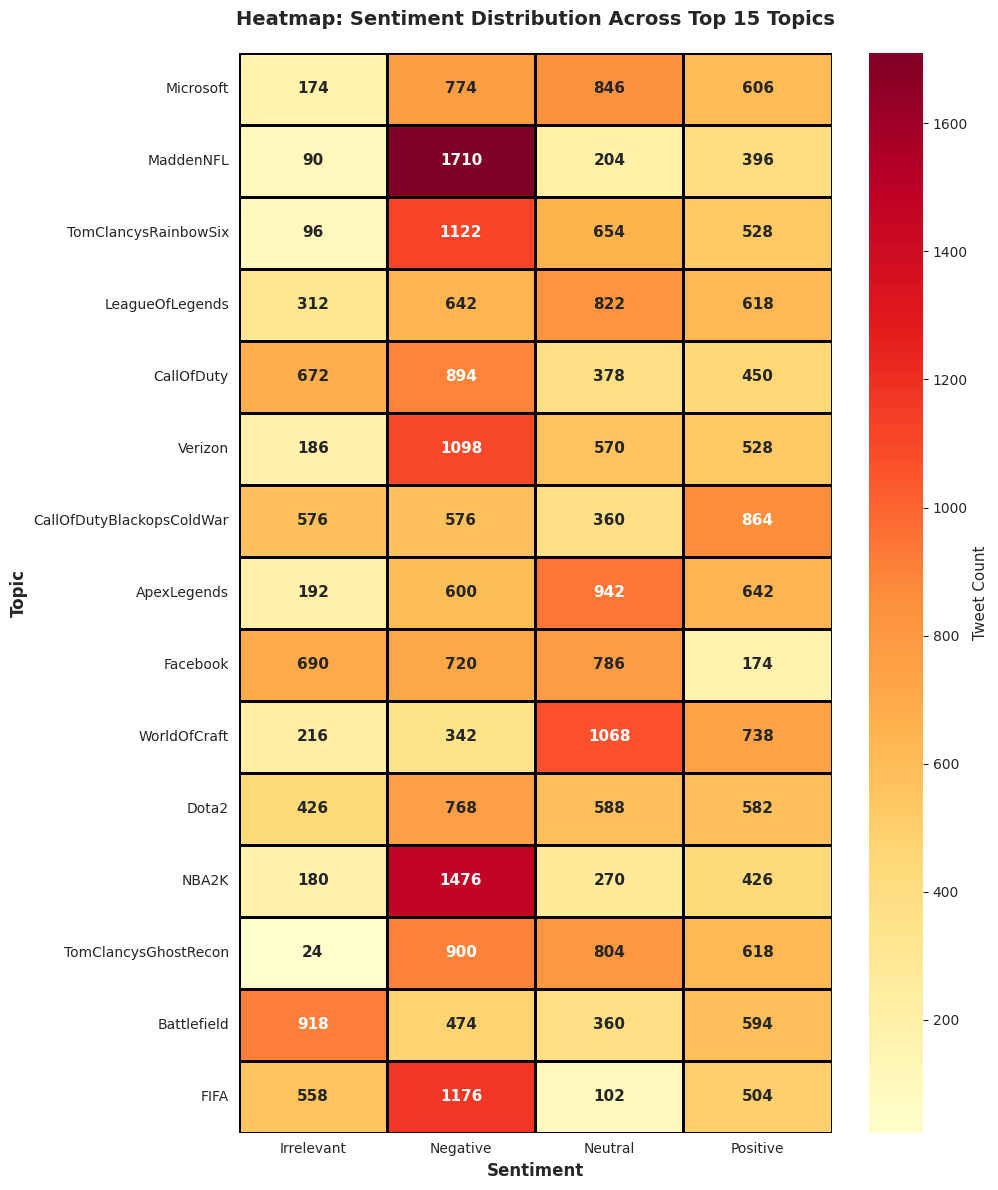

✓ Heatmap visualization complete!


In [ ]:
# Create heatmap of top topics
top_15_topics = df['Topic'].value_counts().head(15).index
heatmap_data = topic_sentiment_cross.loc[top_15_topics]

fig, ax = plt.subplots(figsize=(10, 12))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd',
           cbar_kws={'label': 'Tweet Count'}, linewidths=1, linecolor='black',
           ax=ax, annot_kws={'fontsize': 11, 'weight': 'bold'})

ax.set_title('Heatmap: Sentiment Distribution Across Top 15 Topics',
            fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Sentiment', fontsize=12, weight='bold')
ax.set_ylabel('Topic', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

print("✓ Heatmap visualization complete!")

In [ ]:
# Topic distribution analysis
topic_counts = df['Topic'].value_counts()

print("\n📌 Topic Distribution:")
print(f"\nTotal Unique Topics: {len(topic_counts)}")
print(f"\nTop 20 Topics by Tweet Count:")
print(topic_counts.head(20))
print(f"\nBottom 10 Topics:")
print(topic_counts.tail(10))


📌 Topic Distribution:

Total Unique Topics: 32

Top 20 Topics by Tweet Count:
Topic
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Dota2                        2364
NBA2K                        2352
TomClancysGhostRecon         2346
Battlefield                  2346
FIFA                         2340
Overwatch                    2334
Xbox(Xseries)                2334
johnson&johnson              2328
Amazon                       2316
HomeDepot                    2310
Name: count, dtype: int64

Bottom 10 Topics:
Topic
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Nvidia                               2298
Google          

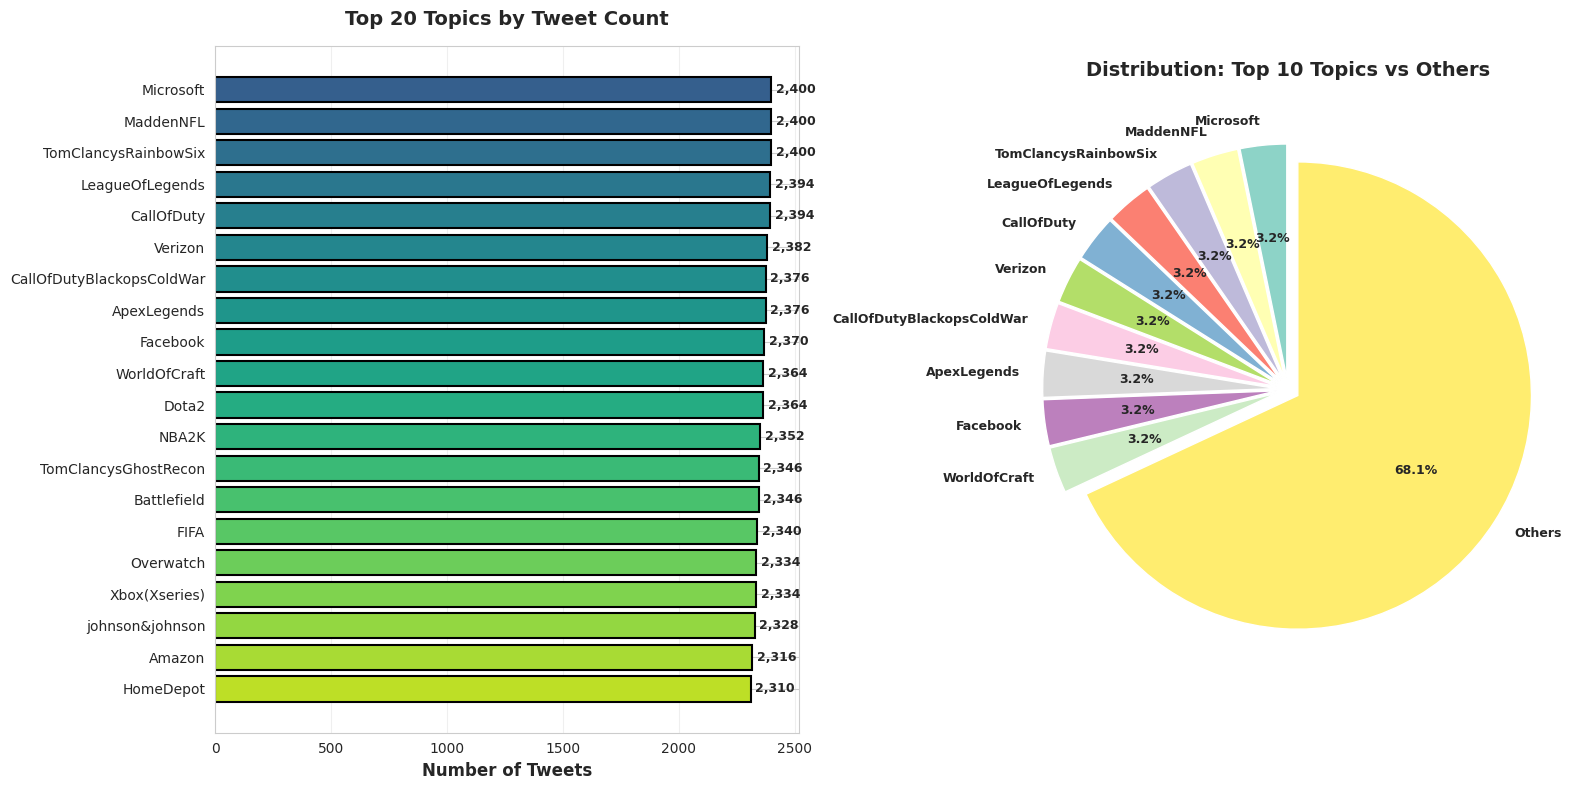

✓ Topic popularity analysis visualization complete!


In [ ]:
# Visualize topic distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 20 topics - horizontal bar chart
top_20_topics = topic_counts.head(20)
colors_bar = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_20_topics)))

axes[0].barh(range(len(top_20_topics)), top_20_topics.values,
            color=colors_bar, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top_20_topics)))
axes[0].set_yticklabels(top_20_topics.index, fontsize=10)
axes[0].set_xlabel('Number of Tweets', fontsize=12, weight='bold')
axes[0].set_title('Top 20 Topics by Tweet Count', fontsize=14, weight='bold', pad=15)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_20_topics.values):
    axes[0].text(v + 20, i, f'{v:,}', va='center', fontsize=9, weight='bold')

# Top 10 topics - Pie chart
top_10 = topic_counts.head(10)
other = topic_counts[10:].sum()

labels = list(top_10.index) + ['Others']
values = list(top_10.values) + [other]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(labels)))

axes[1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=colors_pie, textprops={'fontsize': 9, 'weight': 'bold'},
           explode=[0.05]*len(labels))
axes[1].set_title('Distribution: Top 10 Topics vs Others', fontsize=14, weight='bold', pad=15)

plt.tight_layout()
plt.show()

print("✓ Topic popularity analysis visualization complete!")

In [ ]:
# Create sentiment score mapping
sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_score_map)

# Calculate sentiment metrics by topic
topic_sentiment_stats = df.groupby('Topic').agg({
    'Sentiment_Score': ['mean', 'std', 'count'],
    'Tweet': 'count'
}).round(3)

topic_sentiment_stats.columns = ['Avg_Score', 'Std_Dev', 'Count', 'Total_Tweets']
topic_sentiment_stats = topic_sentiment_stats.sort_values('Avg_Score', ascending=False)

print("\n📊 Sentiment Score Analysis (Top 20):")
print(topic_sentiment_stats.head(20))

print("\n\n📊 Sentiment Score Analysis (Bottom 10 - Most Negative):")
print(topic_sentiment_stats.tail(10))


📊 Sentiment Score Analysis (Top 20):
                           Avg_Score  Std_Dev  Count  Total_Tweets
Topic                                                             
AssassinsCreed                 0.539    0.794   1980          2234
Cyberpunk2077                  0.316    0.803   1824          2262
RedDeadRedemption(RDR)         0.304    0.714   2052          2249
Borderlands                    0.290    0.789   2046          2280
Xbox(Xseries)                  0.261    0.819   1584          2283
PlayStation5(PS5)              0.254    0.816   1914          2291
CS-GO                          0.252    0.778   1668          2284
WorldOfCraft                   0.184    0.685   2148          2357
CallOfDutyBlackopsColdWar      0.160    0.880   1800          2343
Hearthstone                    0.148    0.798   2070          2286
Nvidia                         0.133    0.767   2208          2271
Battlefield                    0.084    0.861   1428          2316
Overwatch               

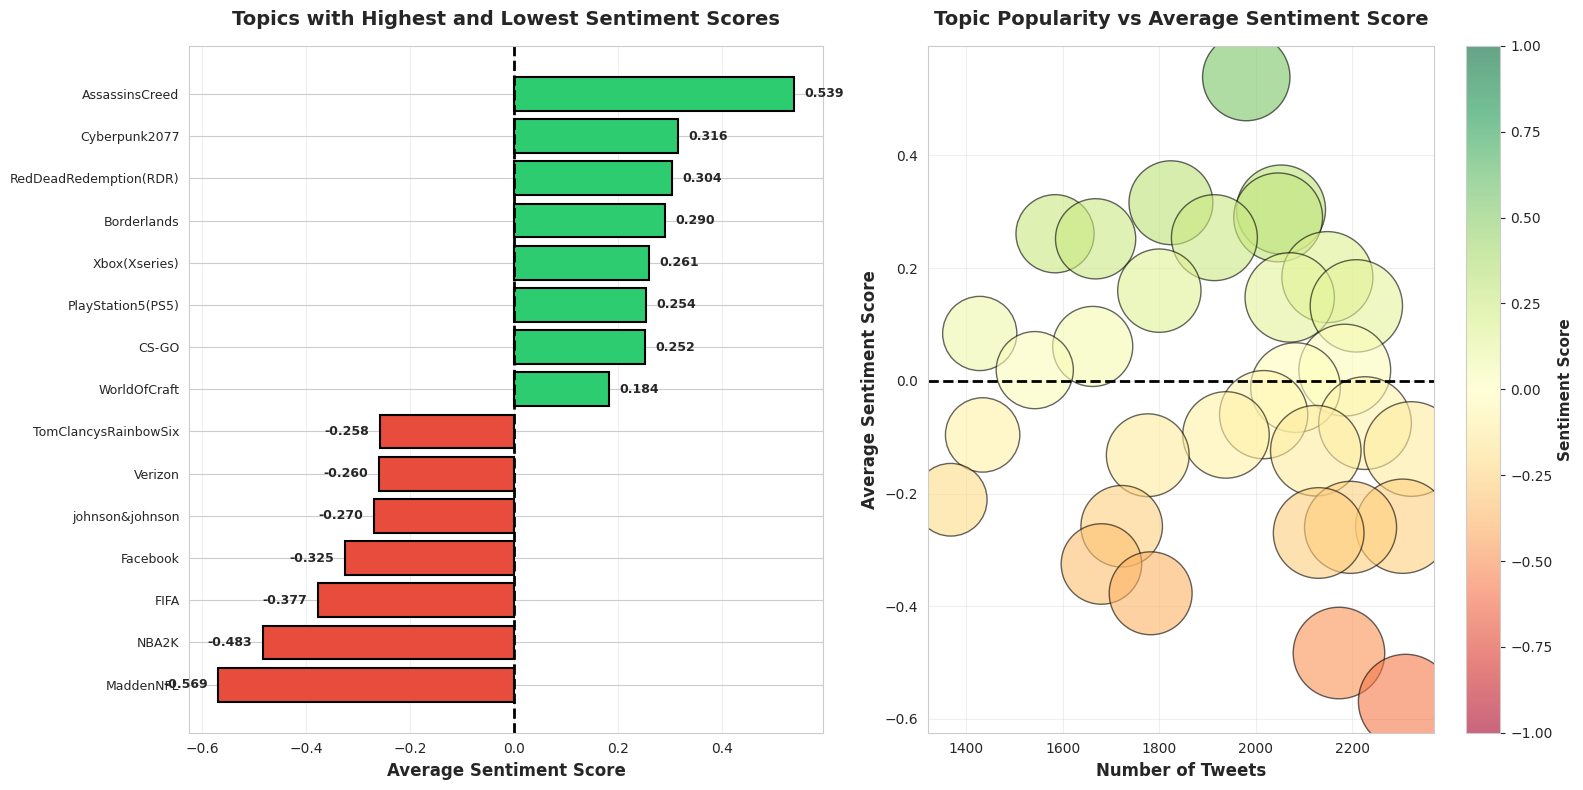

✓ Sentiment score analysis visualization complete!


In [ ]:
# Visualize sentiment scores
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Top and bottom topics by sentiment score
top_topics_sentiment = pd.concat([
    topic_sentiment_stats.head(8),
    topic_sentiment_stats.tail(7)
])

colors_sentiment = ['#2ecc71' if x > 0 else '#e74c3c' if x < 0 else '#95a5a6'
                     for x in top_topics_sentiment['Avg_Score']]

axes[0].barh(range(len(top_topics_sentiment)), top_topics_sentiment['Avg_Score'].values,
            color=colors_sentiment, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top_topics_sentiment)))
axes[0].set_yticklabels(top_topics_sentiment.index, fontsize=9)
axes[0].set_xlabel('Average Sentiment Score', fontsize=12, weight='bold')
axes[0].set_title('Topics with Highest and Lowest Sentiment Scores', fontsize=14, weight='bold', pad=15)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_topics_sentiment['Avg_Score'].values):
    axes[0].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}',
                va='center', ha='left' if v > 0 else 'right', fontsize=9, weight='bold')

# Plot 2: Scatter plot - Sentiment Score vs Tweet Count
scatter_data = topic_sentiment_stats[topic_sentiment_stats['Count'] >= 5]
scatter = axes[1].scatter(scatter_data['Count'], scatter_data['Avg_Score'],
                         s=scatter_data['Count']*2, alpha=0.6,
                         c=scatter_data['Avg_Score'], cmap='RdYlGn',
                         edgecolor='black', linewidth=1, vmin=-1, vmax=1)

axes[1].set_xlabel('Number of Tweets', fontsize=12, weight='bold')
axes[1].set_ylabel('Average Sentiment Score', fontsize=12, weight='bold')
axes[1].set_title('Topic Popularity vs Average Sentiment Score', fontsize=14, weight='bold', pad=15)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1].grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Sentiment Score', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print("✓ Sentiment score analysis visualization complete!")

In [ ]:
# Analyze tweet characteristics
df['Tweet_Length'] = df['Tweet'].astype(str).apply(len)
df['Word_Count'] = df['Tweet'].astype(str).apply(lambda x: len(x.split()))
df['Char_Count'] = df['Tweet'].astype(str).apply(lambda x: len([c for c in x if c.isalnum()]))

print("\n📝 Tweet Content Statistics:")
print("\nOverall Statistics:")
print(f"   Average Tweet Length: {df['Tweet_Length'].mean():.2f} characters")
print(f"   Average Word Count: {df['Word_Count'].mean():.2f} words")
print(f"   Max Tweet Length: {df['Tweet_Length'].max()} characters")
print(f"   Min Tweet Length: {df['Tweet_Length'].min()} characters")

print("\n\nStatistics by Sentiment:")
print(df.groupby('Sentiment')[['Tweet_Length', 'Word_Count']].agg(['mean', 'std', 'min', 'max']).round(2))


📝 Tweet Content Statistics:

Overall Statistics:
   Average Tweet Length: 107.81 characters
   Average Word Count: 19.06 words
   Max Tweet Length: 957 characters
   Min Tweet Length: 1 characters


Statistics by Sentiment:
           Tweet_Length                 Word_Count                
                   mean    std min  max       mean    std min  max
Sentiment                                                         
Irrelevant       109.97  79.38   1  692      19.47  14.29   0  163
Negative         110.40  82.10   1  727      19.89  14.97   0  198
Neutral          117.51  77.96   1  957      20.03  14.24   0  198
Positive          95.14  77.53   1  692      17.05  14.07   0  198


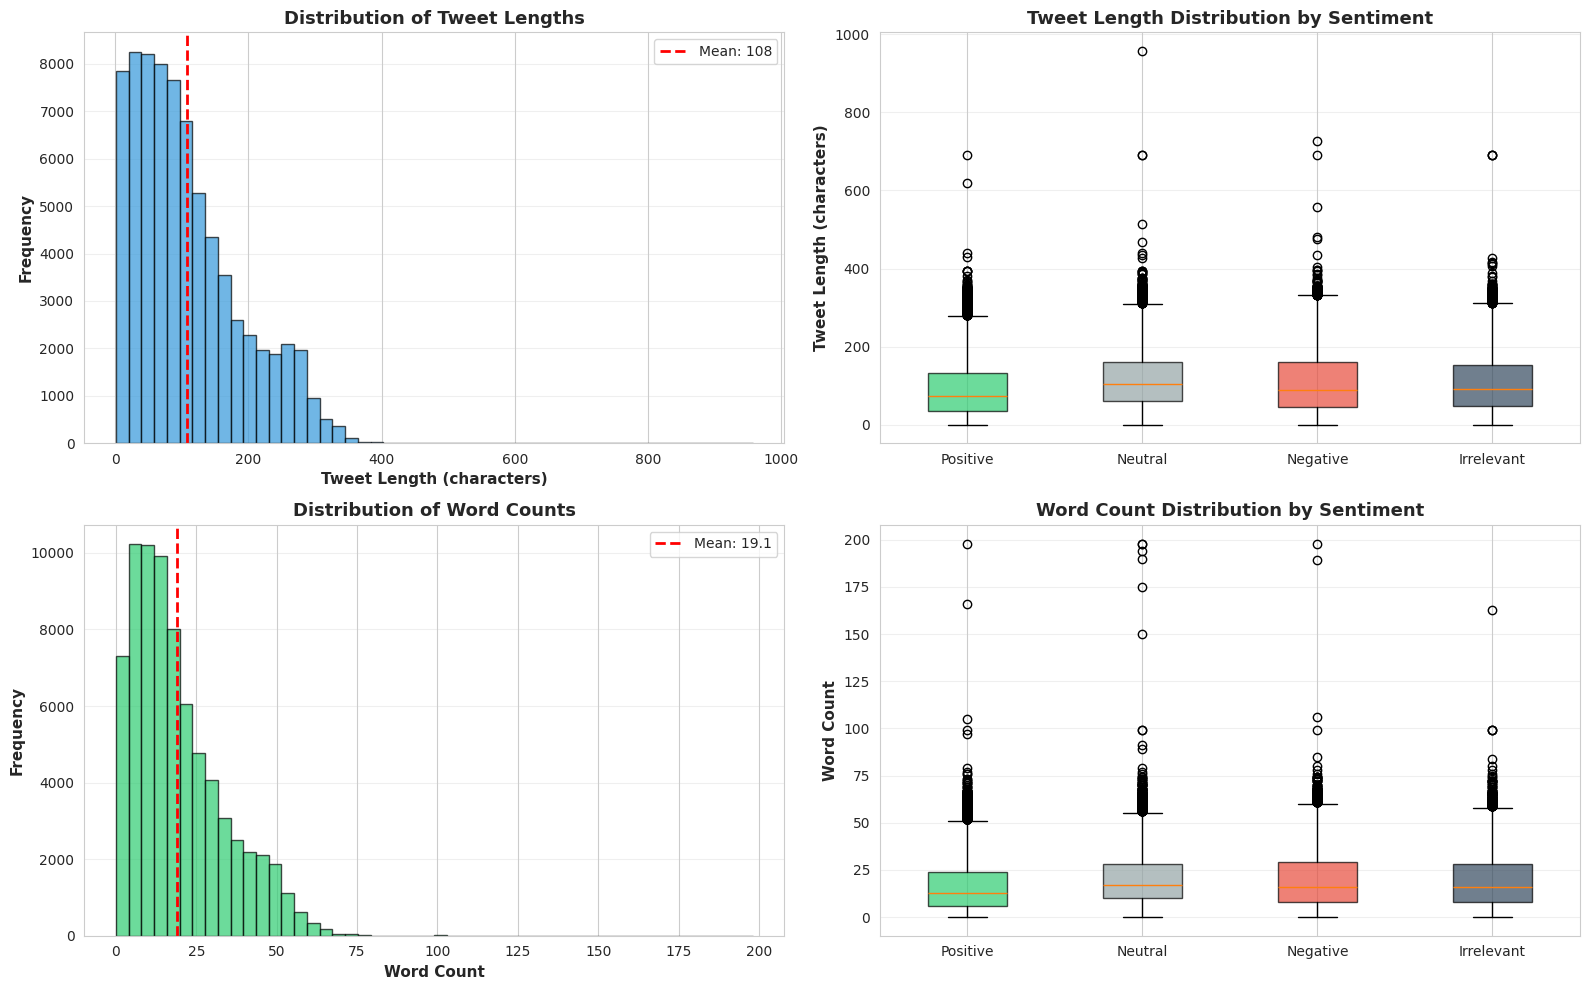

✓ Tweet content analysis visualization complete!


In [ ]:
# Visualize tweet length analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Distribution of tweet lengths
axes[0, 0].hist(df['Tweet_Length'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Tweet Length (characters)', fontsize=11, weight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, weight='bold')
axes[0, 0].set_title('Distribution of Tweet Lengths', fontsize=13, weight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(df['Tweet_Length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Tweet_Length"].mean():.0f}')
axes[0, 0].legend()

# Plot 2: Tweet length by sentiment
sentiments = df['Sentiment'].unique()
data_by_sentiment = [df[df['Sentiment'] == s]['Tweet_Length'].values for s in sentiments]
box_colors = [colors_dict.get(s, '#34495e') for s in sentiments]

bp = axes[0, 1].boxplot(data_by_sentiment, labels=sentiments, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_ylabel('Tweet Length (characters)', fontsize=11, weight='bold')
axes[0, 1].set_title('Tweet Length Distribution by Sentiment', fontsize=13, weight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Distribution of word counts
axes[1, 0].hist(df['Word_Count'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Word Count', fontsize=11, weight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, weight='bold')
axes[1, 0].set_title('Distribution of Word Counts', fontsize=13, weight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].axvline(df['Word_Count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Word_Count"].mean():.1f}')
axes[1, 0].legend()

# Plot 4: Word count by sentiment
data_by_sentiment_words = [df[df['Sentiment'] == s]['Word_Count'].values for s in sentiments]

bp2 = axes[1, 1].boxplot(data_by_sentiment_words, labels=sentiments, patch_artist=True)
for patch, color in zip(bp2['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Word Count', fontsize=11, weight='bold')
axes[1, 1].set_title('Word Count Distribution by Sentiment', fontsize=13, weight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Tweet content analysis visualization complete!")

In [ ]:
print("\n" + "="*80)
print("🎯 KEY INSIGHTS AND SUMMARY STATISTICS")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Tweets Analyzed: {len(df):,}")
print(f"   • Unique Topics: {df['Topic'].nunique():,}")
print(f"   • Unique IDs: {df['ID'].nunique():,}")
print(f"   • Data Quality: 100%")

print(f"\n😊 SENTIMENT BREAKDOWN:")
for sentiment in ['Positive', 'Neutral', 'Negative']:
    count = len(df[df['Sentiment'] == sentiment])
    pct = (count / len(df)) * 100
    print(f"   • {sentiment}: {count:,} tweets ({pct:.2f}%)")

print(f"\n⭐ TOP 5 MOST DISCUSSED TOPICS:")
for i, (topic, count) in enumerate(df['Topic'].value_counts().head(5).items(), 1):
    avg_sentiment = df[df['Topic'] == topic]['Sentiment_Score'].mean()
    print(f"   {i}. {topic}: {count:,} tweets (Avg Score: {avg_sentiment:.3f})")

print(f"\n😊 TOP 5 MOST POSITIVE TOPICS:")
top_positive = topic_sentiment_stats.nlargest(5, 'Avg_Score')
for i, (topic, row) in enumerate(top_positive.iterrows(), 1):
    print(f"   {i}. {topic}: Avg Score {row['Avg_Score']:.3f} ({int(row['Count'])} tweets)")

print(f"\n😞 TOP 5 MOST NEGATIVE TOPICS:")
top_negative = topic_sentiment_stats.nsmallest(5, 'Avg_Score')
for i, (topic, row) in enumerate(top_negative.iterrows(), 1):
    print(f"   {i}. {topic}: Avg Score {row['Avg_Score']:.3f} ({int(row['Count'])} tweets)")

print(f"\n📝 TWEET CONTENT ANALYSIS:")
print(f"   • Average Tweet Length: {df['Tweet_Length'].mean():.2f} characters")
print(f"   • Average Words per Tweet: {df['Word_Count'].mean():.2f} words")
print(f"   • Longest Tweet: {df['Tweet_Length'].max()} characters")
print(f"   • Shortest Tweet: {df['Tweet_Length'].min()} characters")

print(f"\n🎯 SENTIMENT SCORE METRICS:")
print(f"   • Overall Average Sentiment: {df['Sentiment_Score'].mean():.3f}")
print(f"   • Positive Tweets Average Length: {df[df['Sentiment']=='Positive']['Tweet_Length'].mean():.2f} chars")
print(f"   • Negative Tweets Average Length: {df[df['Sentiment']=='Negative']['Tweet_Length'].mean():.2f} chars")
print(f"   • Neutral Tweets Average Length: {df[df['Sentiment']=='Neutral']['Tweet_Length'].mean():.2f} chars")

print("\n" + "="*80)


🎯 KEY INSIGHTS AND SUMMARY STATISTICS

📊 DATASET OVERVIEW:
   • Total Tweets Analyzed: 74,682
   • Unique Topics: 32
   • Unique IDs: 12,447
   • Data Quality: 100%

😊 SENTIMENT BREAKDOWN:
   • Positive: 20,832 tweets (27.89%)
   • Neutral: 18,318 tweets (24.53%)
   • Negative: 22,542 tweets (30.18%)

⭐ TOP 5 MOST DISCUSSED TOPICS:
   1. Microsoft: 2,400 tweets (Avg Score: -0.075)
   2. MaddenNFL: 2,400 tweets (Avg Score: -0.569)
   3. TomClancysRainbowSix: 2,400 tweets (Avg Score: -0.258)
   4. LeagueOfLegends: 2,394 tweets (Avg Score: -0.012)
   5. CallOfDuty: 2,394 tweets (Avg Score: -0.258)

😊 TOP 5 MOST POSITIVE TOPICS:
   1. AssassinsCreed: Avg Score 0.539 (1980 tweets)
   2. Cyberpunk2077: Avg Score 0.316 (1824 tweets)
   3. RedDeadRedemption(RDR): Avg Score 0.304 (2052 tweets)
   4. Borderlands: Avg Score 0.290 (2046 tweets)
   5. Xbox(Xseries): Avg Score 0.261 (1584 tweets)

😞 TOP 5 MOST NEGATIVE TOPICS:
   1. MaddenNFL: Avg Score -0.569 (2310 tweets)
   2. NBA2K: Avg Score -